<a href="https://colab.research.google.com/github/staka99/PPPO/blob/main/IT_57_2018_Marko_Staka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Projektni zadatak iz predmeta Principi prezentacije i prepoznavanje oblika**





**Student: Marko Štaka, IT 57/2018**

# **Detekcija lica**

---

## **Set podataka**

In [85]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw" -O images.zip && rm -rf /tmp/cookies.txt
     

--2022-12-10 23:01:38--  https://docs.google.com/uc?export=download&confirm=t&id=1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw
Resolving docs.google.com (docs.google.com)... 172.217.203.113, 172.217.203.139, 172.217.203.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9l0g8qrsqrjebegessr7nvmdu43j9tdd/1670713275000/06049624160957438625/*/1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw?e=download&uuid=59d0f84a-d070-42e9-9c28-2ac66c36cc6e [following]
--2022-12-10 23:01:38--  https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9l0g8qrsqrjebegessr7nvmdu43j9tdd/1670713275000/06049624160957438625/*/1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw?e=download&uuid=59d0f84a-d070-42e9-9c28-2ac66c36cc6e
Resolving doc-14-64-docs.googleusercontent.com (doc-14-64-docs.googleusercontent.com)... 74.125.31.13

In [86]:
!unzip images.zip

Archive:  images.zip
replace cropped_images/chris_evans/chris_evans1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace cropped_images/chris_evans/chris_evans1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: cropped_images/chris_evans/chris_evans1.png  
  inflating: cropped_images/chris_evans/chris_evans10.png  
  inflating: cropped_images/chris_evans/chris_evans11.png  
  inflating: cropped_images/chris_evans/chris_evans12.png  
  inflating: cropped_images/chris_evans/chris_evans13.png  
  inflating: cropped_images/chris_evans/chris_evans14.png  
  inflating: cropped_images/chris_evans/chris_evans15.png  
  inflating: cropped_images/chris_evans/chris_evans16.png  
  inflating: cropped_images/chris_evans/chris_evans17.png  
  inflating: cropped_images/chris_evans/chris_evans18.png  
  inflating: cropped_images/chris_evans/chris_evans19.png  
  inflating: cropped_images/chris_evans/chris_evans2.png  
  inflating: cropped_images/chris_evans/chris_

## **Detekcija lica pomoću HOG + SVM detektora**

In [87]:
import dlib
import cv2
from matplotlib import pyplot as plt
from imutils import face_utils

In [92]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

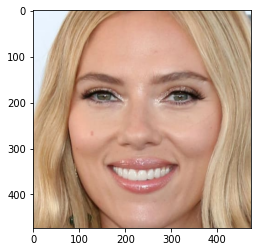

In [93]:
image = cv2.imread('cropped_images/scarlett_johansson/scarlett_johansson42.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

In [96]:
rects = detector (gray, 1)

for (i, rect) in enumerate(rects):
  shape = predictor(gray, rect)
  shape = face_utils.shape_to_np(shape)
  print("Dimenzije prediktor matrice: {0}".format(shape.shape))
  print("Prva 3 elementa matrice")
  print(shape[:3])

  (x,y,w,h) = face_utils.rect_to_bb(rect)
  cv2.rectangle(image, (x, y), (x+w, y+h), (0,255,0), 2)

  cv2.putText(image, "Face #{}".format(i+1), (x-10, y-10),
  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

  for(x,y) in shape:
    cv2.circle(image, (x,y), 4, (0,0,255), -4)

Dimenzije prediktor matrice: (68, 2)
Prva 3 elementa matrice
[[ 78 203]
 [ 77 247]
 [ 82 289]]


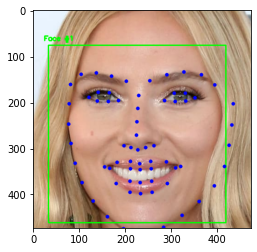

In [97]:
plt.imshow(image)